In [10]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plot_cur

import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model

In [5]:
(images_in_training, labels_in_training), (images_in_test, labels_in_test) = datasets.cifar10.load_data()
#Inorder to pick the training label from single dimension array
labels_in_training=labels_in_training.reshape(-1,)

In [6]:
# Normalize pixel values to be between 0 and 1
images_in_training, images_in_test = images_in_training / 255.0, images_in_test / 255.0

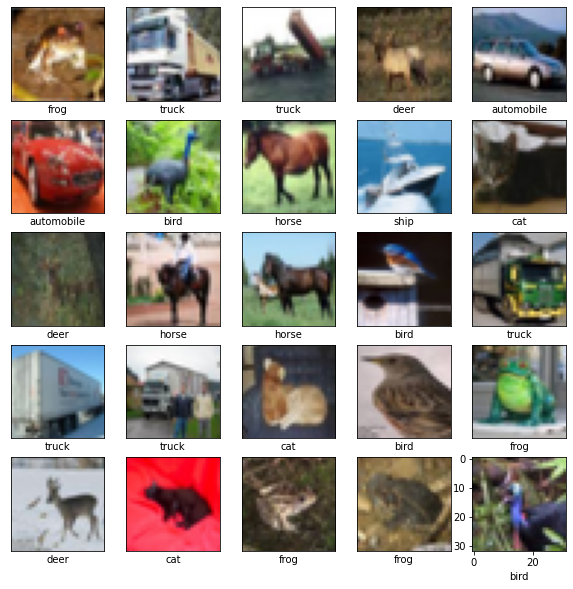

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
def plot_show():
  plot_cur.figure(figsize=(10,10))
  for i in range(25):
      plot_cur.xticks([])
      plot_cur.yticks([])
      plot_cur.subplot(5,5,i+1)
      plot_cur.imshow(images_in_training[i])     
      plot_cur.xlabel(class_names[labels_in_training[i]])
  plot_cur.show()

plot_show()

In [12]:
# number of classes
K = len(set(labels_in_training))
 
# Total number of classes for output layer
print("number of classes:", K)
 
# Using the functional API input layer to build the model
initial_input = Input(shape=images_in_training[0].shape)

cn_layer = Conv2D(64, (3, 3), activation='relu', padding='same')(initial_input)
cn_layer = Conv2D(64, (3, 3), activation='relu', padding='same')(cn_layer)
cn_layer = MaxPooling2D((2, 2))(cn_layer)
 
cn_layer = Conv2D(128, (3, 3), activation='relu', padding='same')(cn_layer)
cn_layer = Conv2D(128, (3, 3), activation='relu', padding='same')(cn_layer)
cn_layer = MaxPooling2D((2, 2))(cn_layer)
 
cn_layer = Conv2D(256, (3, 3), activation='relu', padding='same')(cn_layer)
cn_layer = Conv2D(256, (3, 3), activation='relu', padding='same')(cn_layer)
cn_layer = MaxPooling2D((2, 2))(cn_layer)

cn_layer = Conv2D(512, (3, 3), activation='relu', padding='same')(cn_layer)
cn_layer = Conv2D(512, (3, 3), activation='relu', padding='same')(cn_layer)
cn_layer = MaxPooling2D((2, 2))(cn_layer)
 
cn_layer = Flatten()(cn_layer)
cn_layer = Dropout(0.2)(cn_layer)
 
# Hidden layer
cn_layer = Dense(1024, activation='relu')(cn_layer)
cn_layer = Dropout(0.2)(cn_layer)
 
# last hidden layer-- output layer
cn_layer = Dense(K, activation='softmax')(cn_layer)
 
classifier_model = Model(initial_input, cn_layer)
 
# model description
classifier_model.summary()

number of classes: 10
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       147584    
                                     

In [16]:
classifier_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = classifier_model.fit(images_in_training, labels_in_training, epochs=10, 
                    validation_data=(images_in_test, labels_in_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 1909s 1s/step - loss: 1.3528 - accuracy: 0.5014 - val_loss: 1.1361 - val_accuracy: 0.5889
Epoch 2/10
1563/1563 [==============================] - 1905s 1s/step - loss: 1.0290 - accuracy: 0.6354 - val_loss: 0.9937 - val_accuracy: 0.6466
Epoch 3/10
1563/1563 [==============================] - 1919s 1s/step - loss: 0.8559 - accuracy: 0.7027 - val_loss: 0.8313 - val_accuracy: 0.7126
Epoch 4/10
1563/1563 [==============================] - 1891s 1s/step - loss: 0.7506 - accuracy: 0.7393 - val_loss: 0.8029 - val_accuracy: 0.7242
Epoch 5/10
1563/1563 [==============================] - 1904s 1s/step - loss: 0.6771 - accuracy: 0.7649 - val_loss: 0.7792 - val_accuracy: 0.7359
Epoch 6/10
1563/1563 [==============================] - 1917s 1s/step - loss: 0.6182 - accuracy: 0.7857 - val_loss: 0.7267 - val_accuracy: 0.7600
Epoch 7/10
1563/1563 [==============================] - 1921s 1s/step - loss: 0.5701 - accuracy: 0.8026 - val_loss: 0.7563 - val_accura

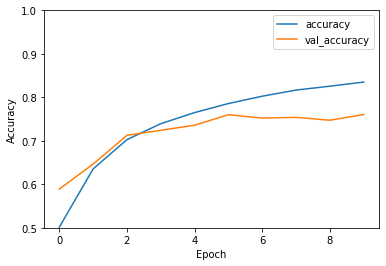

In [17]:
plot_cur.plot(history.history['accuracy'], label='accuracy')
plot_cur.plot(history.history['val_accuracy'], label = 'val_accuracy')
plot_cur.xlabel('Epoch')
plot_cur.ylabel('Accuracy')
plot_cur.ylim([0.5, 1])
plot_cur.legend(loc='upper right')

test_fail, test_accuracy = classifier_model.evaluate(images_in_test,labels_in_test, verbose=3)

In [18]:
print(test_accuracy)

0.7605000138282776
